In [56]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
%matplotlib inline

In [57]:
df=pd.read_csv("D:\sajith\Default_On_Payment.csv")

In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
df.shape
type(df)
df.size
df.head()
df.tail()

(40119, 22)

pandas.core.frame.DataFrame

882618

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015,A14,27,A32,A40,2570,A61,A73,3,A92,...,A121,21,A143,A151,1,A173,1,A191,A201,1
1,100031,A11,12,A34,A43,385,A61,A74,4,A92,...,A121,58,A143,A152,4,A172,1,A192,A201,0
2,100046,A12,13,A34,A43,882,A61,A72,4,A93,...,A121,23,A143,A152,2,A173,1,A191,A201,0
3,100103,A14,24,A32,A40,1393,A61,A73,2,A93,...,A121,31,A143,A152,1,A173,1,A192,A201,0
4,100104,A11,24,A32,A40,3123,A61,A72,4,A92,...,A122,27,A143,A152,1,A173,1,A191,A201,1


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
40114,986907,A11,24,A32,A40,1285,A65,A74,4,A92,...,A124,32,A143,A151,1,A173,1,A191,A201,1
40115,986936,A12,24,A34,A49,1935,A61,A75,4,A91,...,A121,31,A143,A152,2,A173,1,A192,A201,1
40116,986939,A12,60,A32,A40,14027,A61,A74,4,A93,...,A124,27,A143,A152,1,A174,1,A192,A201,1
40117,986944,A12,36,A30,A43,3804,A61,A73,4,A92,...,A123,42,A143,A152,1,A173,1,A192,A201,1
40118,986974,A11,20,A34,A40,2235,A61,A73,4,A94,...,A122,33,A141,A151,2,A173,1,A191,A202,1


In [60]:
pd.isnull(df).any()
pd.isnull(df).sum()
df.info()

Customer_ID                    False
Status_Checking_Acc            False
Duration_in_Months             False
Credit_History                 False
Purposre_Credit_Taken          False
Credit_Amount                  False
Savings_Acc                    False
Years_At_Present_Employment    False
Inst_Rt_Income                 False
Marital_Status_Gender          False
Other_Debtors_Guarantors       False
Current_Address_Yrs            False
Property                       False
Age                            False
Other_Inst_Plans               False
Housing                        False
Num_CC                         False
Job                            False
Dependents                     False
Telephone                      False
Foreign_Worker                 False
Default_On_Payment             False
dtype: bool

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 22 columns):
Customer_ID                    40119 non-null int64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null int64
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null int64
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null int64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null int64
Property                       40119 non-null object
Age                            40119 non-null int64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 non-null int

In [61]:
df.describe()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
count,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000
mean,552084.523642,20.902116,3271.281687,2.973379,2.845086,35.540442,1.407014,1.154889,0.299135
std,261363.936402,12.052772,2821.841476,1.118012,1.103048,11.366368,0.577355,0.361804,0.457885
min,100015.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,325148.500000,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,551443.000000,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,778206.000000,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,999961.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [62]:
print('Counts of Labels')
df.groupby("Default_On_Payment").size()

Counts of Labels


Default_On_Payment
0    28118
1    12001
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 22 columns):
Customer_ID                    40119 non-null int64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null int64
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null int64
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null int64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null int64
Property                       40119 non-null object
Age                            40119 non-null int64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 non-null int

In [64]:
le=preprocessing.LabelEncoder()

In [65]:
le.fit(df['Default_On_Payment'])

LabelEncoder()

In [66]:
list(le.classes_)

[0, 1]

In [67]:
dfn=le.transform(df['Default_On_Payment'])

In [68]:
le.inverse_transform([0,1])

array([0, 1], dtype=int64)

In [69]:
df['Y']=dfn
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 23 columns):
Customer_ID                    40119 non-null int64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null int64
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null int64
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null int64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null int64
Property                       40119 non-null object
Age                            40119 non-null int64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 non-null int

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Y'],
      dtype='object')

In [70]:
x_catg=df.loc[:,('Status_Checking_Acc','Credit_History', 'Purposre_Credit_Taken','Savings_Acc','Years_At_Present_Employment','Marital_Status_Gender',
                 'Other_Debtors_Guarantors','Property','Other_Inst_Plans ','Housing','Job','Telephone',)]

In [78]:
x_catg.head()
x_catg.shape

,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Property,Other_Inst_Plans,Housing,Job,Telephone
0,A14,A32,A40,A61,A73,A92,A101,A121,A143,A151,A173,A191
1,A11,A34,A43,A61,A74,A92,A101,A121,A143,A152,A172,A192
2,A12,A34,A43,A61,A72,A93,A103,A121,A143,A152,A173,A191
3,A14,A32,A40,A61,A73,A93,A103,A121,A143,A152,A173,A192
4,A11,A32,A40,A61,A72,A92,A101,A122,A143,A152,A173,A191


(40119, 12)

In [79]:
x_num=df.loc[:,('Customer_ID','Duration_in_Months',
     'Credit_Amount',
       'Inst_Rt_Income','Current_Address_Yrs',  'Age',
        'Num_CC',  'Dependents',)]
x_num.head()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,100015,27,2570,3,3,21,1,1
1,100031,12,385,4,3,58,4,1
2,100046,13,882,4,4,23,2,1
3,100103,24,1393,2,2,31,1,1
4,100104,24,3123,4,1,27,1,1


In [80]:
x_num1=pd.get_dummies(x_catg)
x_num1.head()

,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,...,Other_Inst_Plans _A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192
0,0,0,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0


In [81]:
x=pd.concat([x_num1,x_num],axis=1)
x.head()

,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,...,Telephone_A191,Telephone_A192,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,0,0,0,1,0,0,1,0,0,1,...,1,0,100015,27,2570,3,3,21,1,1
1,1,0,0,0,0,0,0,0,1,0,...,0,1,100031,12,385,4,3,58,4,1
2,0,1,0,0,0,0,0,0,1,0,...,1,0,100046,13,882,4,4,23,2,1
3,0,0,0,1,0,0,1,0,0,1,...,0,1,100103,24,1393,2,2,31,1,1
4,1,0,0,0,0,0,1,0,0,1,...,1,0,100104,24,3123,4,1,27,1,1


In [82]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 60 columns):
Status_Checking_Acc_A11            40119 non-null uint8
Status_Checking_Acc_A12            40119 non-null uint8
Status_Checking_Acc_A13            40119 non-null uint8
Status_Checking_Acc_A14            40119 non-null uint8
Credit_History_A30                 40119 non-null uint8
Credit_History_A31                 40119 non-null uint8
Credit_History_A32                 40119 non-null uint8
Credit_History_A33                 40119 non-null uint8
Credit_History_A34                 40119 non-null uint8
Purposre_Credit_Taken_A40          40119 non-null uint8
Purposre_Credit_Taken_A41          40119 non-null uint8
Purposre_Credit_Taken_A410         40119 non-null uint8
Purposre_Credit_Taken_A42          40119 non-null uint8
Purposre_Credit_Taken_A43          40119 non-null uint8
Purposre_Credit_Taken_A44          40119 non-null uint8
Purposre_Credit_Taken_A45          40119 non-null u

In [83]:
y=df['Y']
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Y, dtype: int64

In [84]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(30089, 60)

(10030, 60)

(30089,)

(10030,)

pandas.core.frame.DataFrame

In [85]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [86]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
log.coef_

array([[  3.40934307e-08,   1.10224493e-08,  -5.36628674e-09,
         -6.97117474e-08,   8.82335052e-09,   9.28344296e-09,
         -7.06548028e-09,  -1.60122687e-09,  -3.94022404e-08,
          8.06457245e-09,  -1.45225930e-08,   7.16817439e-10,
         -2.40269870e-09,  -2.58425882e-08,   5.20323545e-11,
          6.58341087e-10,   4.15575745e-09,  -1.55144614e-09,
          7.09651099e-10,   1.11204036e-08,  -1.06005405e-09,
         -7.76017136e-09,  -8.00052084e-09,  -2.42618115e-08,
          2.07667153e-09,   9.74049389e-09,  -8.71155298e-09,
         -1.61402580e-08,  -1.69275085e-08,   2.39352971e-09,
          3.41178287e-09,  -3.13805359e-08,  -4.38693077e-09,
         -2.73913918e-08,   3.31890067e-09,  -5.88966302e-09,
         -2.80022437e-08,  -5.65406657e-09,  -8.06362135e-09,
          1.17577775e-08,   7.58471718e-09,   2.60502016e-09,
         -4.01518915e-08,   8.03321072e-09,  -4.35686439e-08,
          5.57327909e-09,  -1.01983750e-10,  -8.03811982e-09,
        

In [88]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values('Variable',ascending=True)

,Variable,Coeff
57,Age,-1.420094e-06
54,Credit_Amount,3.761519e-05
4,Credit_History_A30,8.823351e-09
5,Credit_History_A31,9.283443e-09
6,Credit_History_A32,-7.065480e-09
7,Credit_History_A33,-1.601227e-09
8,Credit_History_A34,-3.940224e-08
56,Current_Address_Yrs,-8.264597e-08
52,Customer_ID,-1.475487e-06
59,Dependents,-3.538425e-08


In [89]:
classes=log.predict(test_x)
print(classes.size)
print('Postive case in Test Data:', test_y[test_y==1].shape[0])
print('Negative case in Test Data:', test_y[test_y==0].shape[0])

10030
Postive case in Test Data: 2999
Negative case in Test Data: 7031


In [90]:
print('Accuracy Score')
print(metrics.accuracy_score(test_y,classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,classes))
print('AUC')
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.703290129611
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.71      0.99      0.82      7031
          1       0.55      0.04      0.08      2999

avg / total       0.66      0.70      0.60     10030

AUC


0.51339547165226318

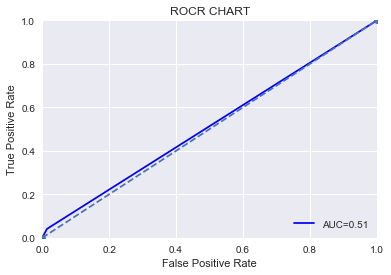

In [91]:
fpr,tpr,th=roc_curve(test_y, classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr, 'b' ,label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')             
plt.show();

Confusion Matrix


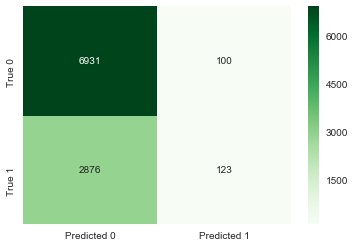

In [92]:
print('Confusion Matrix')
cf= metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf, annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()